In [1]:
import ExplainAI

In [2]:
# 1. read dataset 
from ExplainAI.flx_data.input import input_dataset
d=input_dataset(0)
x=d.drop("SWC",axis=1)
f=list(x.columns)
y_ob=d['SWC']
y=y_ob

In [3]:
#2. split dataset for training and testing
from sklearn.model_selection import train_test_split
xtr,xte,ytr,yte=train_test_split(x,y_ob,test_size=0.33)

In [4]:
#3. select model (sklearn models are supported)
from ExplainAI.model.make_model import make_model
m,res,y_predict=make_model(modeltype='RandomForest',
                             x_train=xtr,
                             y_train=ytr,
                             x_test=xte,
                             y_test=yte)
#     model_list = ['DecisionTree', 'Linear', 'KNeighbors',
#                   'RandomForest', 'AdaBoost',
#                   'GradientBoosting', 'Bagging',
#                   'BayesianRidge', 'SVR']
print(res)

{'r2': 0.9954936545664771, 'MSE': 0.4035894392265198, 'MAE': 0.332566298342541, 'RMSE': 0.6352868952107542}


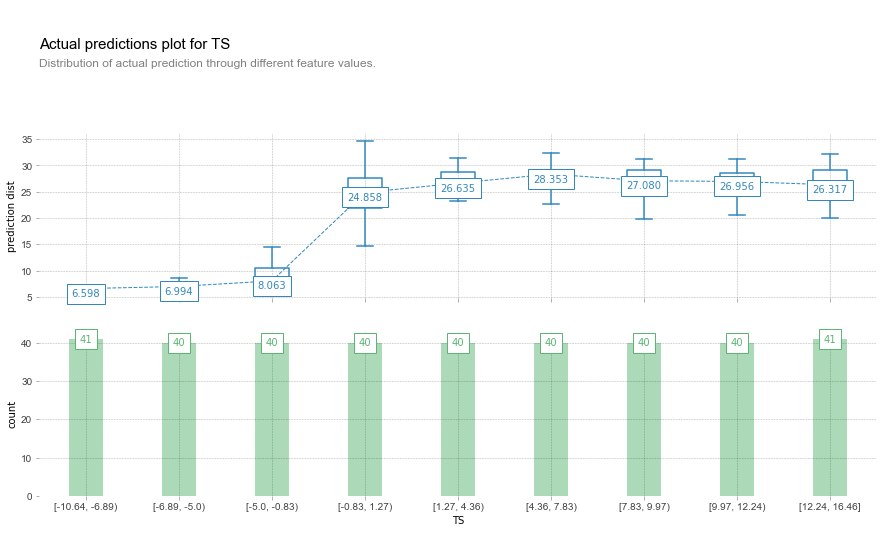

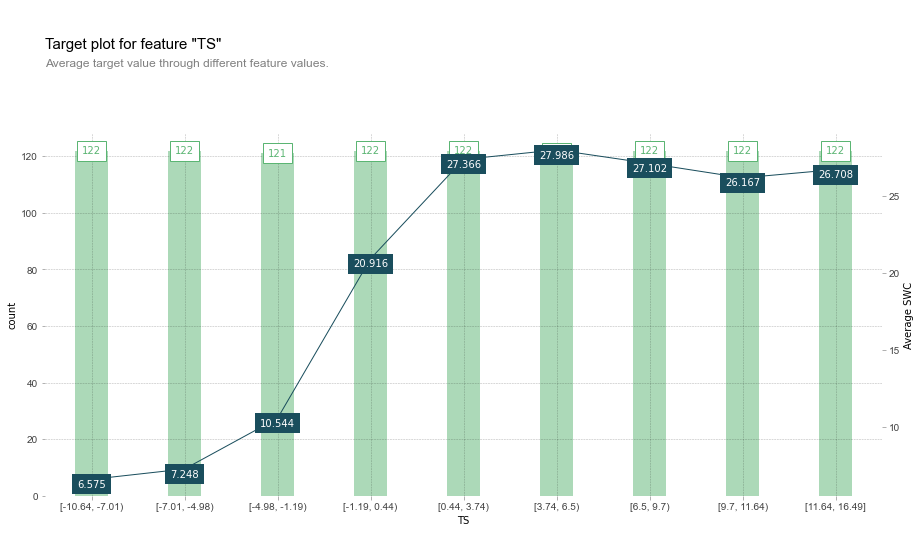

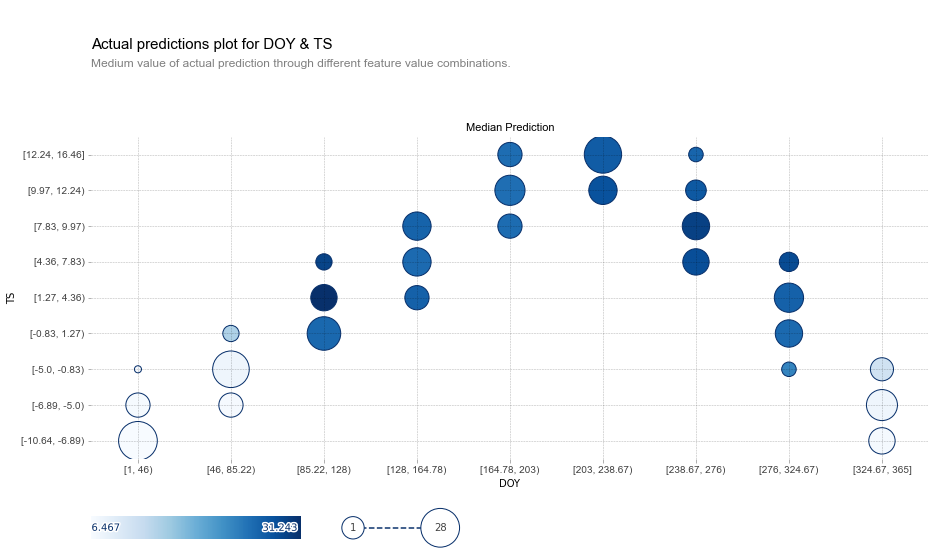

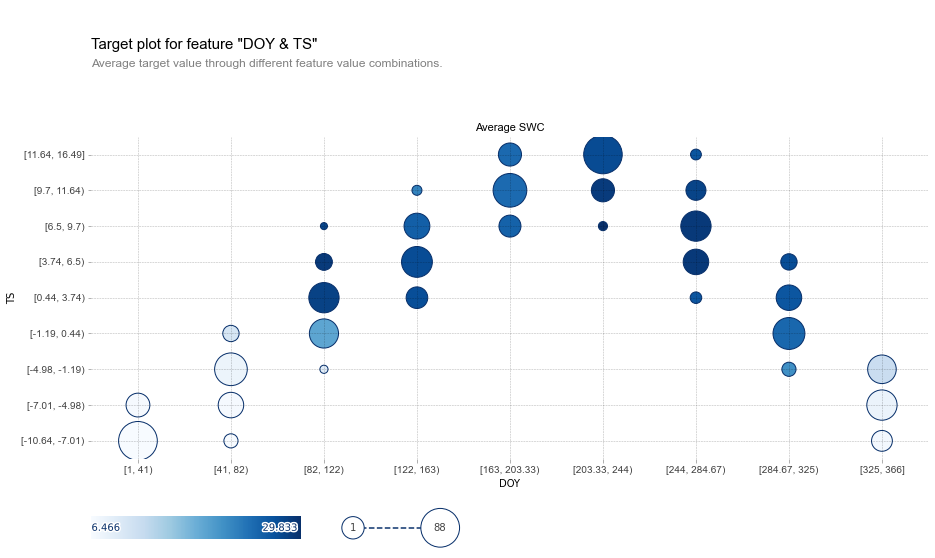

    x1  x2 display_column_1 display_column_2  value_lower_1  value_upper_1  \
0    0   0          [1, 41)  [-10.64, -7.01)            1.0           41.0   
1    0   1          [1, 41)   [-7.01, -4.98)            1.0           41.0   
2    0   2          [1, 41)   [-4.98, -1.19)            1.0           41.0   
3    0   3          [1, 41)    [-1.19, 0.44)            1.0           41.0   
4    0   4          [1, 41)     [0.44, 3.74)            1.0           41.0   
..  ..  ..              ...              ...            ...            ...   
76   8   4       [325, 366]     [0.44, 3.74)          325.0          366.0   
77   8   5       [325, 366]      [3.74, 6.5)          325.0          366.0   
78   8   6       [325, 366]       [6.5, 9.7)          325.0          366.0   
79   8   7       [325, 366]     [9.7, 11.64)          325.0          366.0   
80   8   8       [325, 366]   [11.64, 16.49]          325.0          366.0   

    value_lower_2  value_upper_2  count       SWC  
0      -10.

In [5]:
#4. preview distribution of prediction and feature 
from ExplainAI.preview import info_plots
import matplotlib.pyplot as plt
# # show distribution with feature of interest ("TS")
fig1, axes, summary_df = info_plots.actual_plot(model=m, X=xte, feature="TS", feature_name="TS")
#
fig2, axes, summary_df = info_plots.target_plot(df=d, target="SWC", feature="TS", feature_name="TS")
# # show distribution under two features' interaction
fig3, axes, summary_df = info_plots.actual_plot_interact(model=m, X=xte, features=["DOY", "TS"], feature_names=["DOY", "TS"])
#
fig4, axes, summary_df = info_plots.target_plot_interact(df=d, target="SWC", features=["DOY", "TS"], feature_names=["DOY", "TS"])
plt.show()
fig4.savefig('fig4.jpg')
print(summary_df)

   feature          pi
0      DAY    0.419795
1      DOY    0.338754
2       TA    0.419098
3       SW    0.368461
4       TS    0.412025
5       LE    0.420868
6      GPP    0.434395
7     RECO    0.430843
8     SWC1  180.101879
9     SWC2    0.336018
10    SWC3    0.421370
11    SWC4    0.435304
12    SWC5    0.431914
13      P0    0.311173
14      P1    0.223754
15      P2    0.432301


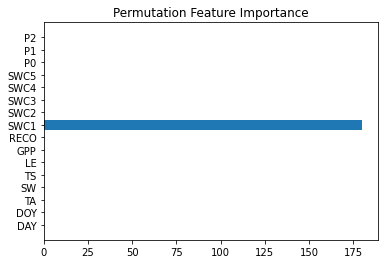

,feature,pi
0,DAY,0.419795
1,DOY,0.338754
2,TA,0.419098
3,SW,0.368461
4,TS,0.412025
5,LE,0.420868
6,GPP,0.434395
7,RECO,0.430843
8,SWC1,180.101879
9,SWC2,0.336018


In [6]:
# 5. permutation importance
from ExplainAI.explainers.pi.pi import permutation_importance_xai
rmse=res['RMSE']
permutation_importance_xai(m,f,x,y,rmse)

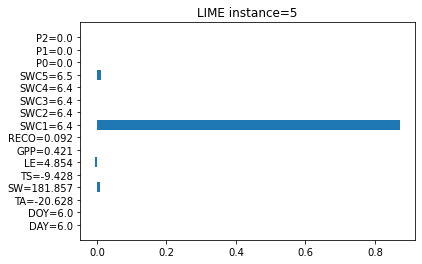

     feature  lime_var       value      ystick
DAY      DAY  0.000903    6.000000     DAY=6.0
DOY      DOY  0.000000    6.000000     DOY=6.0
TA        TA  0.000000  -20.628000  TA=-20.628
SW        SW  0.009448  181.857000  SW=181.857
TS        TS  0.000000   -9.428000   TS=-9.428
LE        LE -0.004269    4.853500    LE=4.854
GPP      GPP -0.000000    0.420799   GPP=0.421
RECO    RECO -0.000000    0.091506  RECO=0.092
SWC1    SWC1  0.871304    6.400000    SWC1=6.4
SWC2    SWC2  0.000000    6.400000    SWC2=6.4
SWC3    SWC3  0.000000    6.400000    SWC3=6.4
SWC4    SWC4  0.000000    6.400000    SWC4=6.4
SWC5    SWC5  0.011949    6.500000    SWC5=6.5
P0        P0  0.000000    0.000000      P0=0.0
P1        P1  0.000000    0.000000      P1=0.0
P2        P2  0.000000    0.000000      P2=0.0


<Figure size 432x288 with 0 Axes>

In [7]:
# 6. lime
from ExplainAI.explainers.lime.lime_xai import lime_xai
lime_res=lime_xai(m=m,x=x,y_ob=y_ob,instance=5,n=10000,num_bins=25)
print(lime_res)

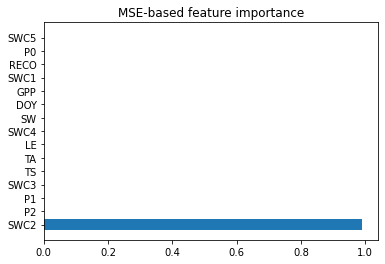

   feature       MFI
0      DOY  0.000376
1       TA  0.000674
2       SW  0.000427
3       TS  0.000689
4       LE  0.000547
5      GPP  0.000366
6     RECO  0.000237
7     SWC1  0.000258
8     SWC2  0.991041
9     SWC3  0.001017
10    SWC4  0.000514
11    SWC5  0.000157
12      P0  0.000193
13      P1  0.001379
14      P2  0.001950


In [8]:
# 7.mfi
from ExplainAI.explainers.mfi.mfi import mse_feature_importance
mfi=mse_feature_importance(model=m, data=d, target="SWC",top=15,save=True,plot=True)
print(mfi)

    quantiles       ALE
0   -9.007500 -0.359736
1   -8.151000 -0.331884
2   -7.540875 -0.306312
3   -7.168500 -0.303238
4   -6.639375 -0.288312
5   -6.096750 -0.266705
6   -5.685750 -0.252372
7   -5.294000 -0.246631
8   -4.969375 -0.235774
9   -4.437500 -0.190959
10  -3.790875 -0.164066
11  -2.663000 -0.129836
12  -1.477625 -0.063514
13  -0.793250 -0.040300
14  -0.376000 -0.031954
15  -0.197000  0.091868
16   0.068750  0.099296
17   0.623000  0.169704
18   1.208000  0.166525
19   2.284500  0.167673
20   3.012250  0.164821
21   3.627000  0.157393
22   4.028375  0.150689
23   4.621000  0.144368
24   5.200375  0.143516
25   5.871500  0.138553
26   6.760375  0.133767
27   7.887500  0.131804
28   8.502625  0.130841
29   9.053500  0.128698
30   9.638625  0.122698
31  10.029000  0.121044
32  10.399875  0.117527
33  10.874750  0.105009
34  11.219250  0.099973
35  11.840500  0.112788
36  12.403250  0.100232
37  13.109000  0.104232
38  14.142500  0.104380
39  16.486000  0.104195
             1.0

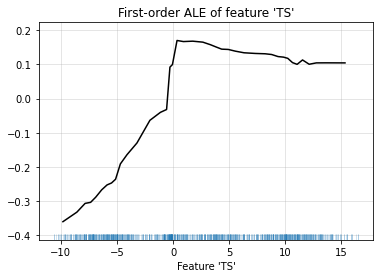

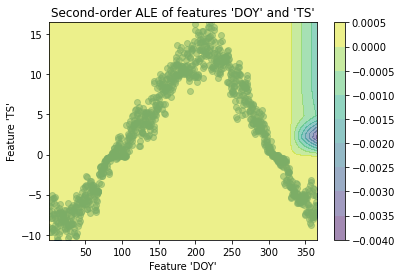

In [13]:
# 8. ale
from ExplainAI.explainers.ale.ale import accumulated_local_effect_1d,accumulated_local_effect_2d
a1=accumulated_local_effect_1d(model=m, train_set=x, features='TS',plot=False,save=True,monte_carlo=False)
a2=accumulated_local_effect_2d(m, train_set=x, features=['DOY', 'TS'], plot=False, bins=10,save=True)
print(a1)
print(a2)

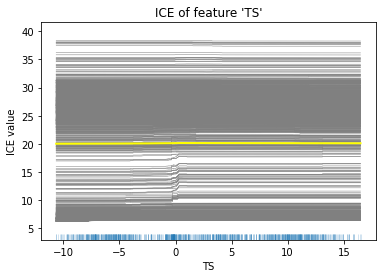

In [14]:
# 9.ice
from ExplainAI.explainers.ice.ice import individual_conditional_exception
i=individual_conditional_exception(data=x, feature='TS', model=m,plot=True,save=True,save_path='ice.jpg')

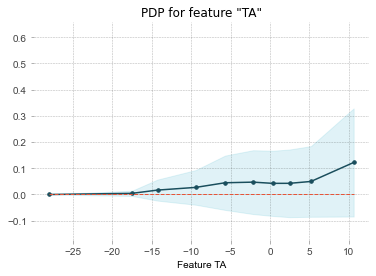

   x       xticklabels  count  count_norm
0  0  [-27.97, -17.48)    122    0.111314
1  1  [-17.48, -14.25)    122    0.111314
2  2   [-14.25, -9.41)    121    0.110401
3  3    [-9.41, -5.69)    122    0.111314
4  4    [-5.69, -2.15)    122    0.111314
5  5     [-2.15, 0.35)    121    0.110401
6  6      [0.35, 2.47)    122    0.111314
7  7      [2.47, 5.19)    122    0.111314
8  8      [5.19, 10.6]    122    0.111314


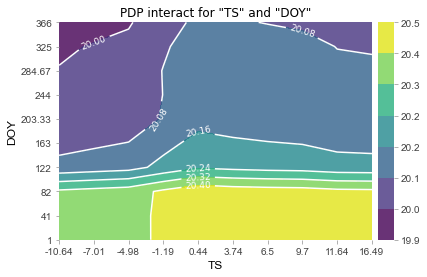

        TS         DOY      preds
0  -10.636    1.000000  20.339213
1  -10.636   41.000000  20.337938
2  -10.636   82.000000  20.334286
3  -10.636  122.000000  20.104605
4  -10.636  163.000000  20.055069
..     ...         ...        ...
95  16.486  203.333333  20.089422
96  16.486  244.000000  20.085686
97  16.486  284.666667  20.087201
98  16.486  325.000000  20.076476
99  16.486  366.000000  20.057689

[100 rows x 3 columns]


In [15]:
# 10.pdp
from ExplainAI.explainers.pdp.pdp import partial_dependence_plot_1d,partial_dependence_plot_2d
pd1=partial_dependence_plot_1d(model=m,data=x,model_features=f,feature="TA",plot=True,save=True)
print(pd1)
pd2=partial_dependence_plot_2d(model=m,data=x,model_features=f,features=["TS",'DOY'],plot=True,save=True)
print(pd2)

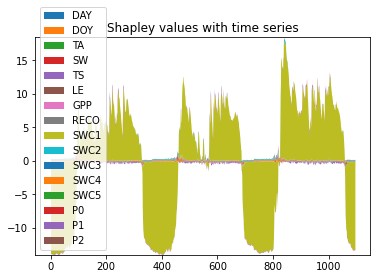

               DAY          DOY           TA           SW           TS  \
count  1096.000000  1096.000000  1096.000000  1096.000000  1096.000000   
mean     -0.002059     0.037244     0.007429     0.016134     0.023867   
std       0.030485     0.123196     0.034757     0.056416     0.047966   
min      -0.167041    -0.470561    -0.173637    -0.271204    -0.170584   
25%      -0.009906    -0.033112    -0.005909    -0.007887    -0.006636   
50%      -0.002586    -0.010322     0.007446     0.014001     0.034652   
75%       0.008468     0.146071     0.016045     0.041619     0.050037   
max       0.130910     0.896800     0.467885     0.631146     0.476164   

                LE          GPP         RECO         SWC1         SWC2  \
count  1096.000000  1096.000000  1096.000000  1096.000000  1096.000000   
mean      0.006204     0.006369     0.007640     0.007778     0.048789   
std       0.028833     0.018253     0.026830     9.535295     0.067519   
min      -0.204901    -0.084561    -0

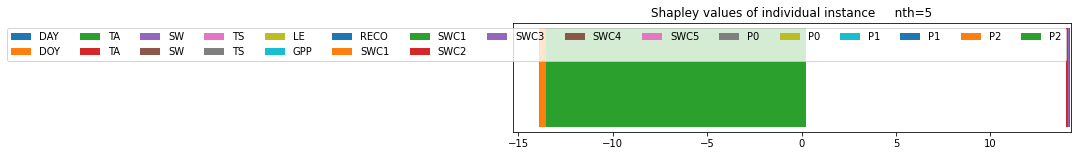

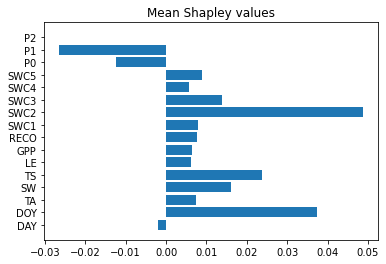

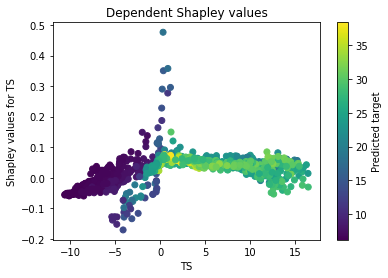

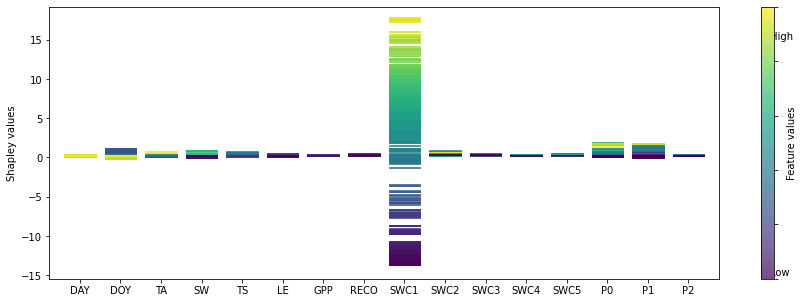

,feature,value,color
0,DAY,0.004562,0.000000
1,DAY,0.004685,0.000913
2,DAY,0.004765,0.001826
3,DAY,0.004576,0.002740
4,DAY,0.005057,0.003653
...,...,...,...
1091,P2,-0.003697,0.000000
1092,P2,-0.003775,0.000000
1093,P2,-0.003757,0.000000
1094,P2,-0.003412,0.000000


In [16]:
# 11.shapley

from ExplainAI.explainers.shap.shap_xai import TreeExplainer
ex = TreeExplainer(m)

sv = ex.shap_values(x)
from ExplainAI.explainers.shap.shap_plt import shap_time_xai
shap_time_xai(sv,f,plot=True, save=True,
                            describe=True,save_path='shap_time.jpg')
from ExplainAI.explainers.shap.shap_plt import shap_instance_xai
shap_instance_xai(sv,f,5,plot=True,save=True,save_path='shap_instance.jpg')

from ExplainAI.explainers.shap.shap_plt import shap_mean_xai
shap_mean_xai(sv, f, plot=True, save=True, describe=False, save_path='shap_mean.jpg')


from ExplainAI.explainers.shap.shap_plt import shap_dependence_xai
shap_dependence_xai(sv,m,x, f, dependence_feature='TS',plot=True, save=True, describe=False)

from ExplainAI.explainers.shap.shap_plt import shap_feature_xai
shap_feature_xai(sv,x=x,features=f, plot=True, save=True, describe=False,save_path='shap_feav.jpg')